In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Enable interactive mode 
#%matplotlib widget

In [2]:
import requests
from PIL import Image
from io import BytesIO
# Displaying the image
#image.show()

## Mathematics, a tool to find optimal solutions

### Gradient for Optimization

In [3]:
# Define 1D and 2D convex functions and their gradients
def f0_1d(x): #convex
    return x**2 - 4*x + 4
def grad_f0_1d(x):
    return 2*x - 4

def f1_1d(x): #nonconvex
    return .25 *  (x**2 - 27)**2

def grad_f1_1d(x):
    return x * (x**2 - 27)

def f2d(x, y):
    return .5 * (x - 1)**2 + .5 * (y + 1)**2 

def grad_f2d(x, y):
    return np.array([x - 1, y + 1])



In [4]:
# Gradient Descent algorithm for 1D function
def gradient_descent_1d(f, grad_f, x0, learning_rate, max_iter):
    x = x0
    history = [x0]
    for i in range(max_iter):
        x = x - learning_rate * grad_f(x)
        history.append(x)
    return x, history

# Gradient Descent algorithm for 2D function
def gradient_descent_2d(f, grad_f, x0, learning_rate, max_iter):
    x = x0
    history = [x0]
    for i in range(max_iter):
        x = x - learning_rate * grad_f(*x)
        history.append(x)
    return x, history

In [5]:
# Plotting function for 2D function
def plot_2d_func(f):
    x_vals = np.linspace(-5, 5, 20)
    y_vals = np.linspace(-5, 5, 20)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f(X, Y)
    # Create the plot 
    fig = plt.figure(figsize=(10, 7)) 
    ax = fig.add_subplot(111, projection='3d') 
    ax.plot_surface(X, Y, Z, cmap='viridis') 
    ax.set_xlabel('X') 
    ax.set_ylabel('Y') 
    ax.set_zlabel('f(X, Y)') 
    ax.set_title('3D Plot of a 2D Function')
    plt.show()
#plot_2d_func(f2d)

### Convexity and Lipschitz continuity simplify Optimization

Choice of the step size becomes delicate

Initial guess is also just a guess. It influences minimization of nonconvex functions

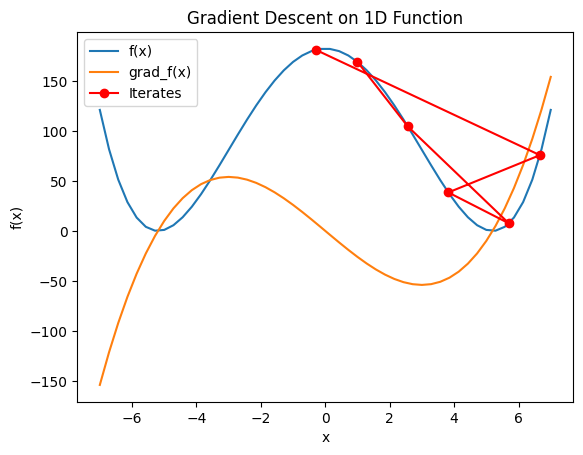

In [6]:
# Plotting function for 1D function
def plot_1d(f, grad_f, history):
    x_vals = np.linspace(-7, 7, 50)
    y_vals = f(x_vals)
    plt.plot(x_vals, y_vals, label='f(x)')
    plt.plot(x_vals, grad_f(x_vals), label='grad_f(x)')
    plt.plot(history, [f(x) for x in history], 'ro-', label='Iterates')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.title('Gradient Descent on 1D Function')
    plt.show()

# Initial parameters
x0_1d = 1
learning_rate_1d = 0.06
max_iter = 5

# Perform Gradient Descent on 1D function
functions_and_grad_1D = [[f0_1d, grad_f0_1d], [f1_1d, grad_f1_1d]]
[f, grad_f] = functions_and_grad_1D[1]
final_x_1d, history_1d = gradient_descent_1d(f, grad_f, x0_1d, learning_rate_1d, max_iter)
plot_1d(f, grad_f, history_1d) 

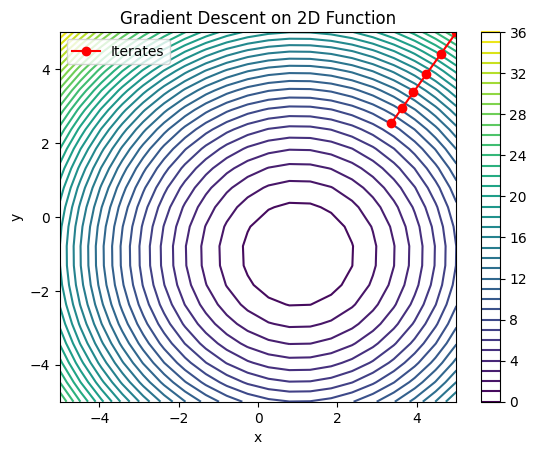

In [7]:
# Plotting function for 2D function
def plot_2d(f, history):
    x_vals = np.linspace(-5, 5, 20)
    y_vals = np.linspace(-5, 5, 20)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f(X, Y)
    
    plt.contour(X, Y, Z, levels=40, cmap='viridis')
    hx, hy = zip(*history)
    plt.plot(hx, hy, 'ro-', label='Iterates')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Gradient Descent on 2D Function')
    plt.colorbar()
    plt.show()



# Initial parameters for 2D function
x0_2d = np.array([5, 5])
learning_rate_2d = 0.1

# Perform Gradient Descent on 2D function
final_x_2d, history_2d = gradient_descent_2d(f2d, grad_f2d, x0_2d, learning_rate_2d, max_iter)
plot_2d(f2d, history_2d)


In [8]:
#C:\Users\sefojere\AppData\Local\miniconda3\envs\howfar

## Signal sampling 

gives you finite number of information on the signal, to work with on a computer.

The more you sample (higher frequency sampler), the more details you get.

### Case 1 : 1D signals become vectors

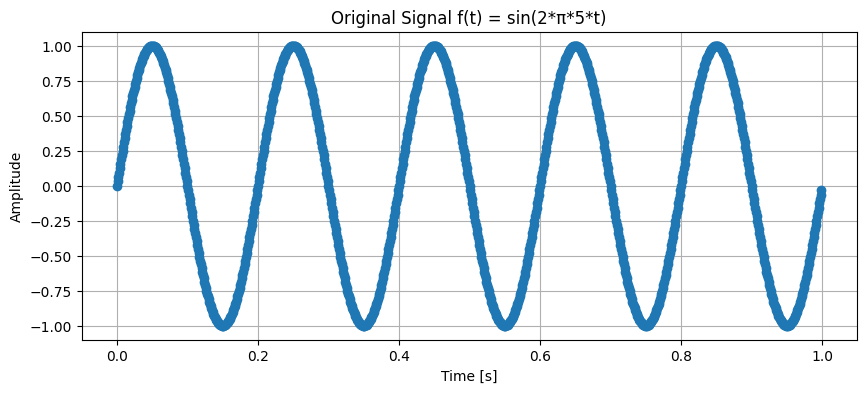

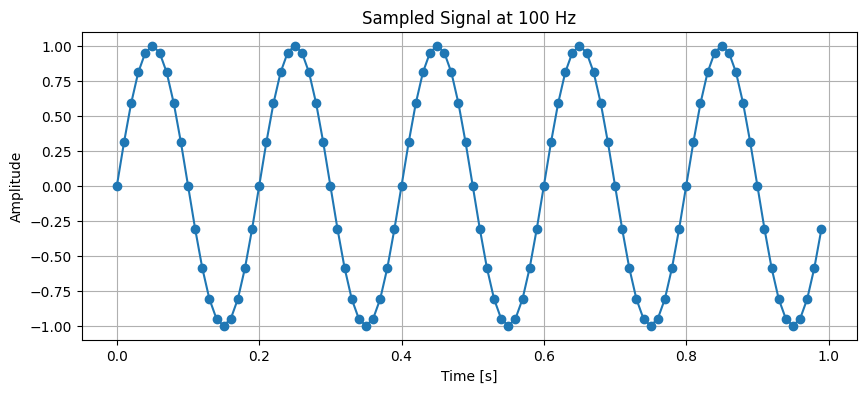

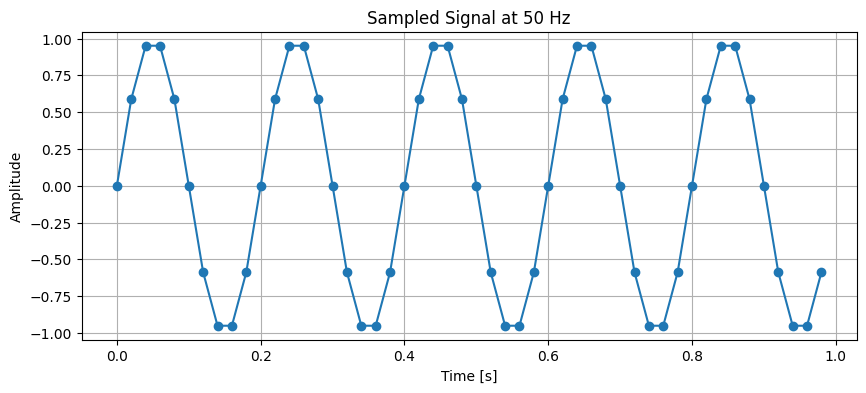

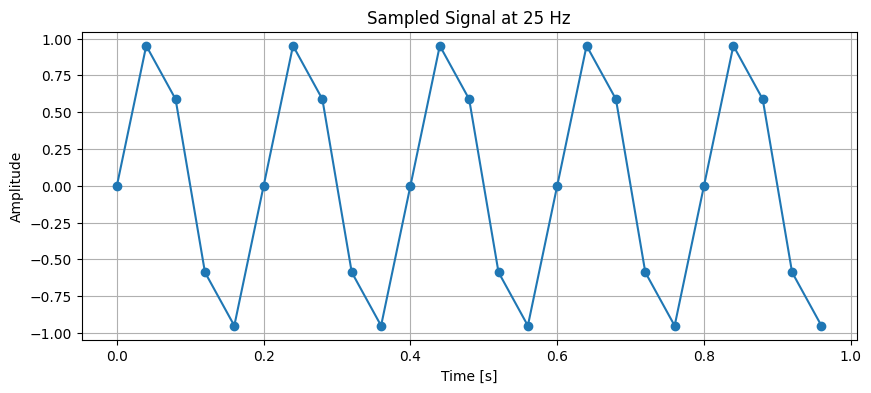

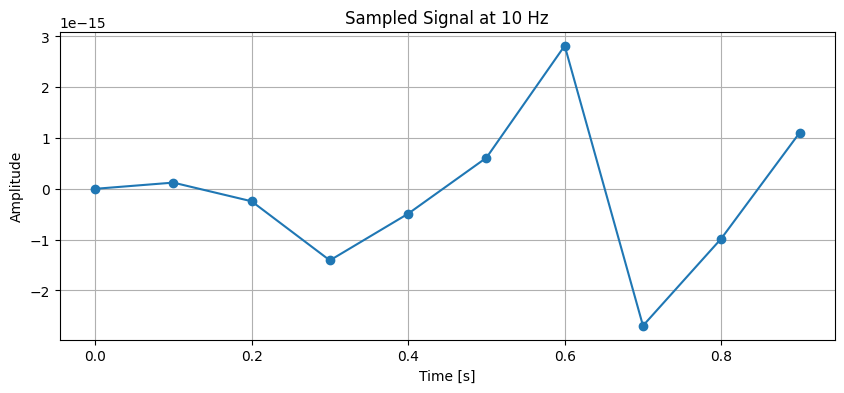

In [9]:
# Function to generate and sample the signal 
def sample_signal(sample_rates, duration=1): 
    frequency = 5 
    t_or = np.arange(0, duration, 1/1000) 
    signal_or = np.sin(2 * np.pi * frequency * t_or)
    plt.figure(figsize=(10, 4)) 
    plt.plot(t_or, signal_or, marker='o') 
    plt.title(f'Original Signal f(t) = sin(2*π*{frequency}*t)') 
    plt.xlabel('Time [s]') 
    plt.ylabel('Amplitude') 
    plt.grid(True)

    for sample_rate in sample_rates:
        # Time vector based on the sample rate and duration 
        t = np.arange(0, duration, 1/sample_rate) 
        # Generate a sinusoidal signal (e.g., 5 Hz) 
        
        signal = np.sin(2 * np.pi * frequency * t) 

        # Plot the sampled signal 
        plt.figure(figsize=(10, 4)) 
        plt.plot(t, signal, marker='o') 
        plt.title(f'Sampled Signal at {sample_rate} Hz') 
        plt.xlabel('Time [s]') 
        plt.ylabel('Amplitude') 
        plt.grid(True)
    return t, signal 
sample_rates = [100, 50, 25, 10]
t, signal = sample_signal(sample_rates, duration=1)

### Case 2 : 2D images become matrices i.e. discretized functions of 2D space

C:\Users\sefojere\AppData\Local\Temp\ipykernel_5964\4016454214.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


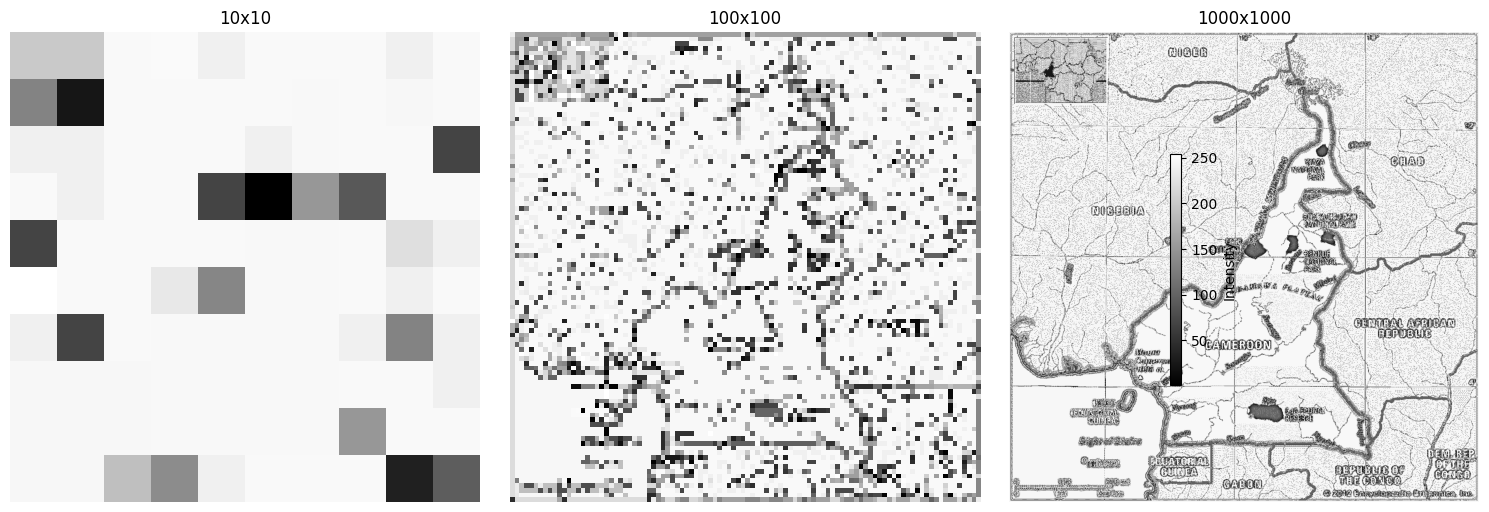

In [10]:
from PIL import Image 
# Function to plot an image at different resolutions 
def plot_image_at_resolutions(image_path, resolutions): 
    # Load the image 
    # Sending a HTTP request to the image URL
    ##response = requests.get(image_path)
    # Opening the image
    ##image = Image.open(BytesIO(response.content))
    image = Image.open(image_path) 
    fig, axes = plt.subplots(1, len(resolutions), figsize=(15, 5)) 
    for ax, resolution in zip(axes, resolutions): 
        # Resize the image 
        resized_image = image.resize(resolution) 
        # Convert to numpy array for plotting 
        resized_array = np.array(resized_image) 
        # Plot the resized image 
        im = ax.imshow(resized_array, cmap='gray') #viridis #cividis #magma #plasma #inferno
        ax.set_title(f'{resolution[0]}x{resolution[1]}') 
        ax.axis('off') # Hide axes 
    # # Add a single color bar for all plots 
    cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6) 
    cbar.set_label('Intensity')
    plt.tight_layout()    
    plt.show() 
    return resized_array
# Path to the image 
image_path = r'C:\Users\sefojere\Downloads\Cameroon_map.jpg' 
# Image URL
#image_path = 'https://raw.githubusercontent.com/JeremieSefo/How-far-can-Mathematics-Go__Applied-Maths/refs/heads/main/Cameroon_map.jpg?token=GHSAT0AAAAAAC2PHOOJ6WPHNGA7F3FIBZMSZZWL4EQ'
# List of resolutions (width, height) to display 
resolutions = [(10, 10), (100, 100), (1000, 1000)] 
# Plot the image at specified resolutions 
resized_array = plot_image_at_resolutions(image_path, resolutions)

## Inverse Problems

### Some Linear Algebra  
(start a Whiteboard sharing)

Idea: Point out matrix-vector multiplication as sensing/measuring (Physics, frequencies components for e.g.) the
object properties. 

Explain the concepts of overdetermine system/matrix, matrix with kernel, or matrix with
full range. 

Continue with their implication in object recovery from measurements.

### Example 1 of sensing matrix : Fourier Transform

\begin{align}
\hat{f}(\xi) =  \int_{\mathbb{R}^d} f(x) \exp{(-i2\pi \xi \cdot x)} dx
\end{align}

#### Motivation

If you combine sound waves, for example by playing several notes at the same time, their magnitudes sum to create a new wave that hits your ear. 

Here’s three individual simple sine waves (in blue), and their sum (in black).

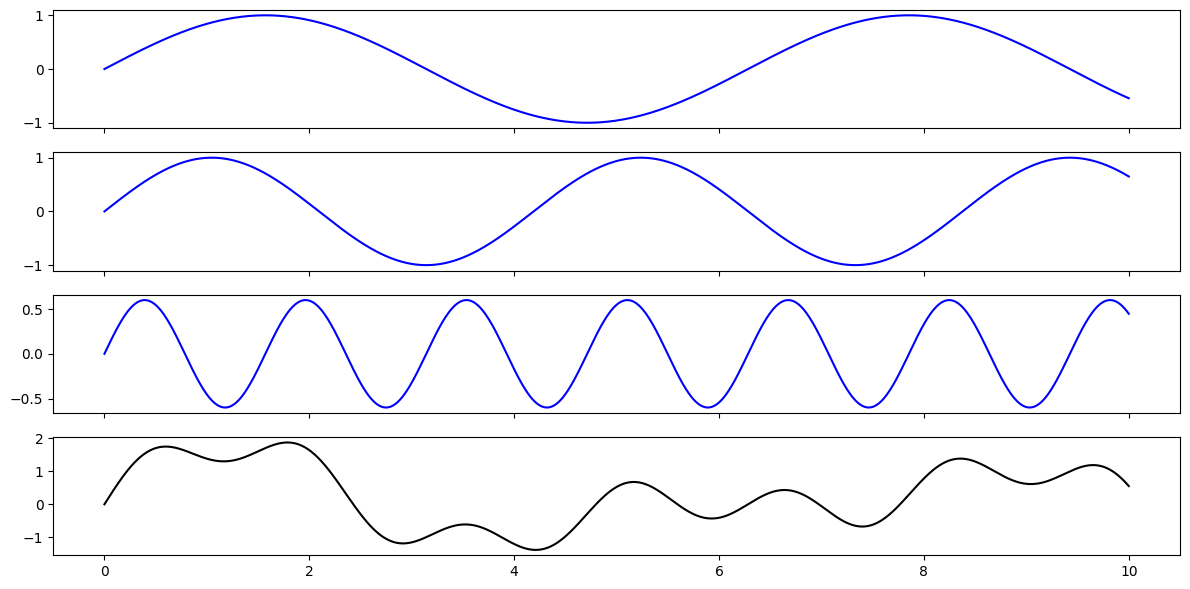

In [11]:
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(12,6))

ss = 1000
ts = np.linspace(0, 10, ss)

ys = np.zeros((3, ss))
ys[0,:] = np.sin(ts)
ys[1,:] = np.sin(1.5 * ts)
ys[2,:] = 0.6 * np.sin(4 * ts)

for k, ax in enumerate(axs[:3]):
    ax.plot(ts, ys[k,:], 'b-')

axs[-1].plot(ts, np.sum(ys, axis=0), 'k-')

plt.tight_layout()
plt.show()


#### Problem : Can we extract the contributing parts precisely, from the combined curve?

Yes, It’s possible, using Fourier transforms.

It decomposes the signal into frequency components: 

<img src="https://raw.githubusercontent.com/aavella77/fft/main/24.02.02-time_frequency.png" width=950>

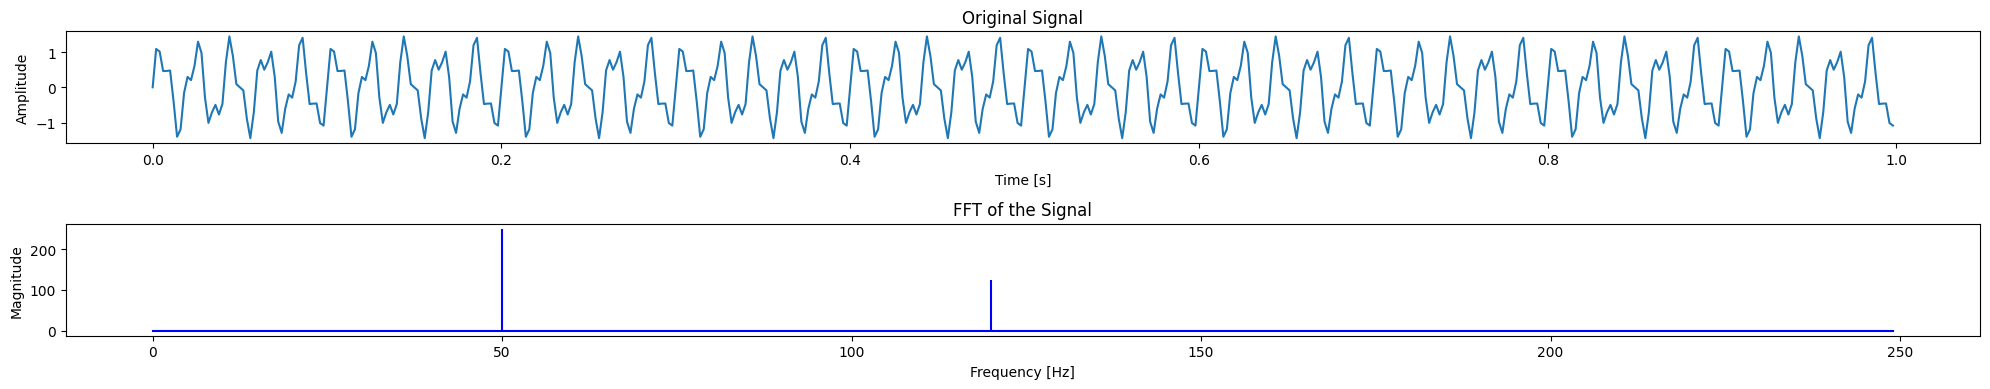

In [12]:
# Generate a sample signal 
fs = 500 # Sampling frequency 
t = np.arange(0, 1, 1/fs) # Time vector 
# Signal with two frequencies: 50 Hz and 120 Hz 
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t) 
# Compute the Fast Fourier Transform (FFT) 
fft_values = np.fft.fft(signal) 
fft_freq = np.fft.fftfreq(len(signal), 1/fs) 
# Plot the signal 
plt.figure(figsize=(20, 4)) 
plt.subplot(2, 1, 1) 
plt.plot(t, signal) 
plt.title('Original Signal') 
plt.xlabel('Time [s]') 
plt.ylabel('Amplitude')
# Plot the FFT 
plt.subplot(2, 1, 2) 
plt.stem(fft_freq[:len(fft_freq)//2], np.abs(fft_values)[:len(fft_values)//2], 'b', markerfmt=" ", basefmt="-b") 
plt.title('FFT of the Signal') 
plt.xlabel('Frequency [Hz]') 
plt.ylabel('Magnitude') 
plt.tight_layout() 
plt.show()

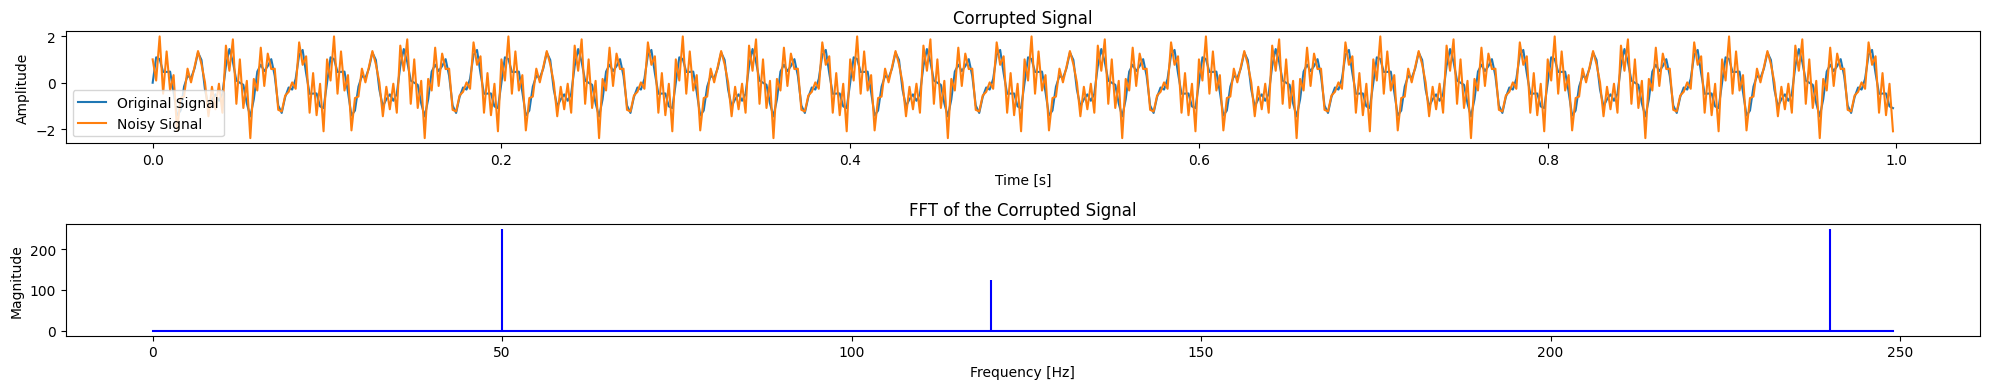

In [13]:
noise_freq = 240
noise = 1 * np.cos(2 * np.pi * noise_freq * t)
noisy_signal = signal +  noise
# Compute the Fast Fourier Transform (FFT) 
fft_values = np.fft.fft(noisy_signal) 
fft_freq = np.fft.fftfreq(len(noisy_signal), 1/fs) 
# Plot the signal 
plt.figure(figsize=(20, 4)) 
plt.subplot(2, 1, 1) 
plt.plot(t, signal, label='Original Signal') 
plt.plot(t, noisy_signal, label='Noisy Signal')
#plt.plot(t, signal, t, noisy_signal ) 
plt.title('Corrupted Signal') 
plt.xlabel('Time [s]') 
plt.ylabel('Amplitude')
plt.legend()
# Plot the FFT 
plt.subplot(2, 1, 2) 
plt.stem(fft_freq[:len(fft_freq)//2], np.abs(fft_values)[:len(fft_values)//2], 'b', markerfmt=" ", basefmt="-b") 
plt.title('FFT of the Corrupted Signal') 
plt.xlabel('Frequency [Hz]') 
plt.ylabel('Magnitude') 
plt.tight_layout() 
plt.show()

c:\Users\sefojere\AppData\Local\miniconda3\envs\howfar\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\sefojere\AppData\Local\miniconda3\envs\howfar\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


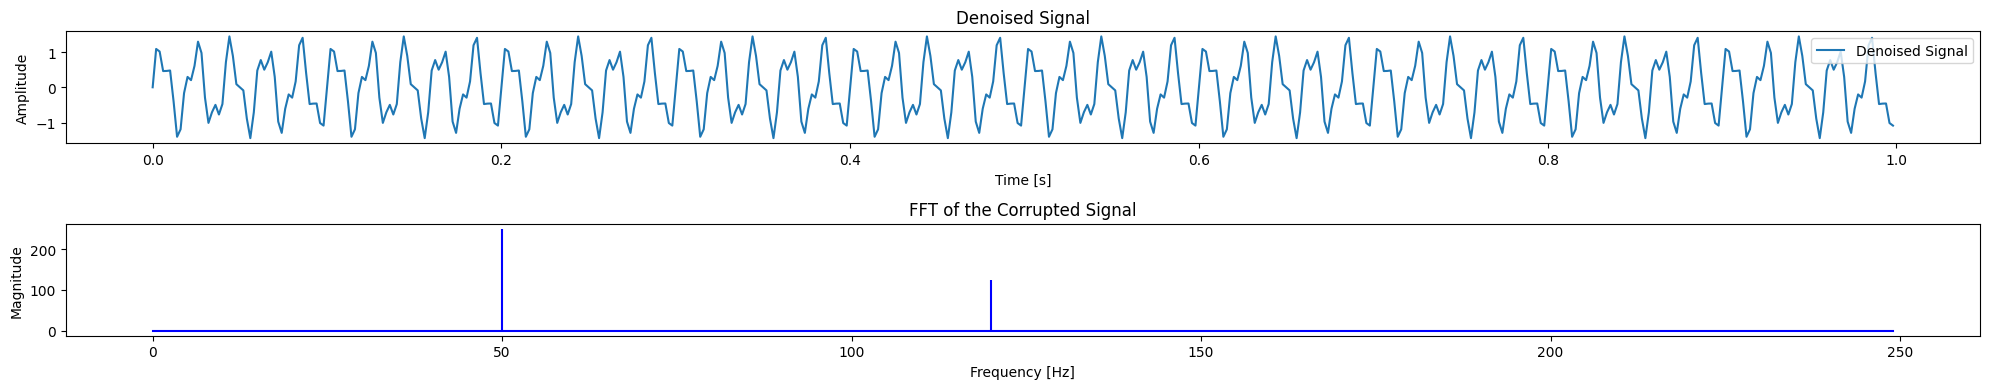

In [14]:
cut_fft_values = fft_values * (np.abs(fft_freq) <  noise_freq )
denoised_signal = np.fft.ifft(cut_fft_values)
fft_values = np.fft.fft(denoised_signal)
# Plot the signal 
plt.figure(figsize=(20, 4)) 
plt.subplot(2, 1, 1) 
plt.plot(t, denoised_signal, label='Denoised Signal') 
#plt.plot(t, signal, t, noisy_signal ) 
plt.title('Denoised Signal') 
plt.xlabel('Time [s]') 
plt.ylabel('Amplitude')
plt.legend()
# Plot the FFT 
plt.subplot(2, 1, 2) 
plt.stem(fft_freq[:len(fft_freq)//2], np.abs(fft_values)[:len(fft_values)//2], 'b', markerfmt=" ", basefmt="-b") 
plt.title('FFT of the Corrupted Signal') 
plt.xlabel('Frequency [Hz]') 
plt.ylabel('Magnitude') 
plt.tight_layout() 
plt.show()

### Example 2 of sensing matrix : Convolution operator : Image deblurring

\begin{align*}
\textbf{Convolution of an image } \, f \, \textbf{with a kernel } \, g
\end{align*}

\begin{align*}
h(x) = (f*g)(x) = \int_{-\infty}^\infty f(y)g(x - y)\,dy \,
\end{align*}

\begin{align*}
\textbf{Convolution theorem}
\end{align*}

\begin{align*}
\hat{h}(\xi) = \hat{f}(\xi)\, \hat{g}(\xi)
\end{align*}

\begin{align*}
\textbf{Recall : Fourier transform}
\end{align*}

\begin{align*}
\hat{f}(\xi) =  \int_{\mathbb{R}^d} f(x) \exp{(-i2\pi \xi \cdot x)} dx
\end{align*}

\begin{align*}
\text{Below, we use a Gaussian filter} \, g(x,y) = \frac{1}{2\pi \sigma^{2} } \exp{(-\frac{x^{2}+y^{2}}{2 \sigma^{2}})}
\end{align*}

\begin{align*}
\text{Note that} \, \hat{g}(\xi,\zeta) \propto \exp\{-{2 \sigma^{2}} {(\xi^{2}+\zeta^{2})}\} \, \text{is also a Gaussian distribution, but inversely spread}
\end{align*}

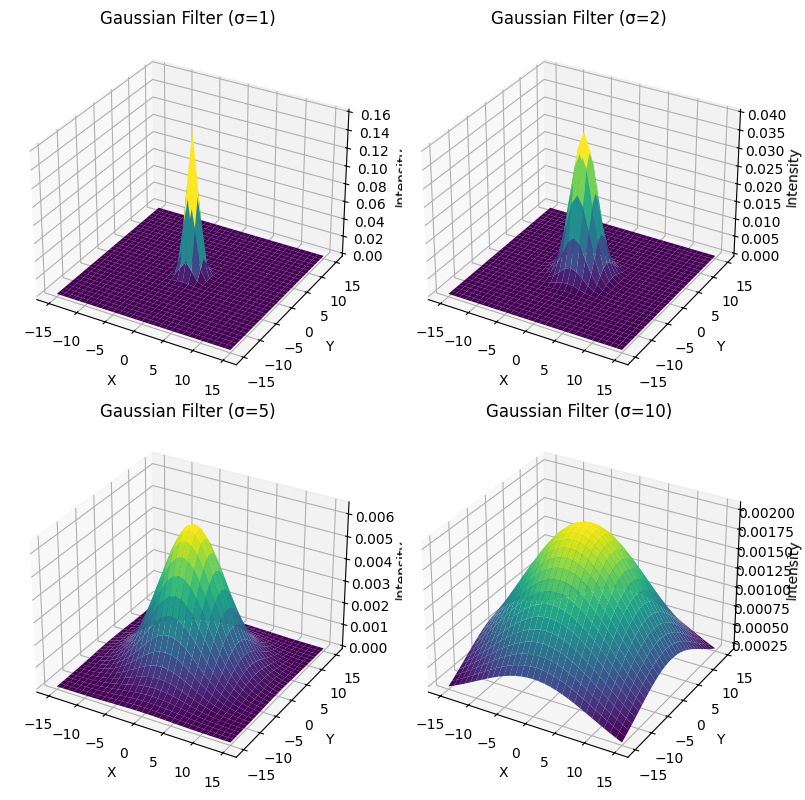

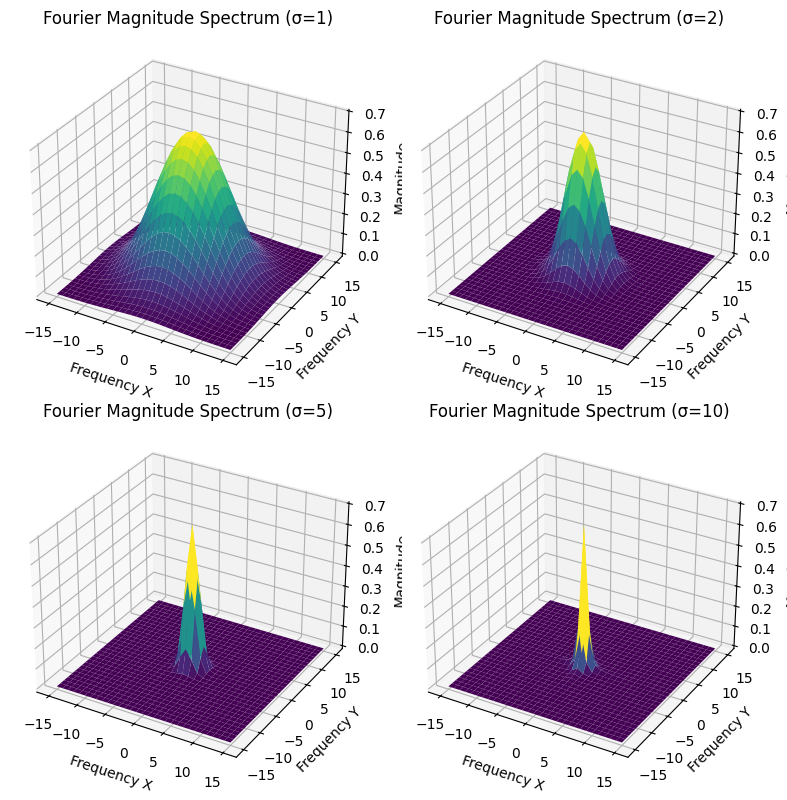

In [157]:

from mpl_toolkits.mplot3d import Axes3D
from scipy.fftpack import fft2, fftshift

# Function to create a 2D Gaussian filter
def gaussian_filter_2d(size, sigma):
    x, y = np.meshgrid(np.linspace(-size // 2 + 1, size // 2, size), np.linspace(-size // 2 + 1, size // 2, size))
    g = np.exp(-((x**2 + y**2) / (2.0 * sigma**2)))
    return g / g.sum()

# List of sigma values
sigma_values = [1, 2, 5, 10]

# Create a figure with subplots for 3D plotting of Gaussian filters
fig = plt.figure(figsize=(8, 8))

for i, sigma in enumerate(sigma_values, start=1):
    size = 31  # Size of the filter
    gaussian_filter = gaussian_filter_2d(size, sigma)
    
    ax = fig.add_subplot(2, 2, i, projection='3d')
    x = y = np.linspace(-size // 2 + 1, size // 2, size)
    X, Y = np.meshgrid(x, y)
    
    ax.plot_surface(X, Y, gaussian_filter, cmap='viridis')
    ax.set_title(f'Gaussian Filter (σ={sigma})')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensity')

plt.tight_layout()
plt.show()

# Create a figure with subplots for Fourier magnitude spectra
fig = plt.figure(figsize=(8, 8))

for i, sigma in enumerate(sigma_values, start=1):
    size = 31  # Size of the filter
    gaussian_filter = gaussian_filter_2d(size, sigma)
    
    # Compute the Fourier transform
    fft_gaussian = fftshift(fft2(gaussian_filter))
    fft_magnitude = np.log1p(np.abs(fft_gaussian))
    
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.plot_surface(X, Y, fft_magnitude, cmap='viridis')
    ax.set_title(f'Fourier Magnitude Spectrum (σ={sigma})')
    ax.set_xlabel('Frequency X')
    ax.set_ylabel('Frequency Y')
    ax.set_zlabel('Magnitude')

plt.tight_layout()
plt.show()


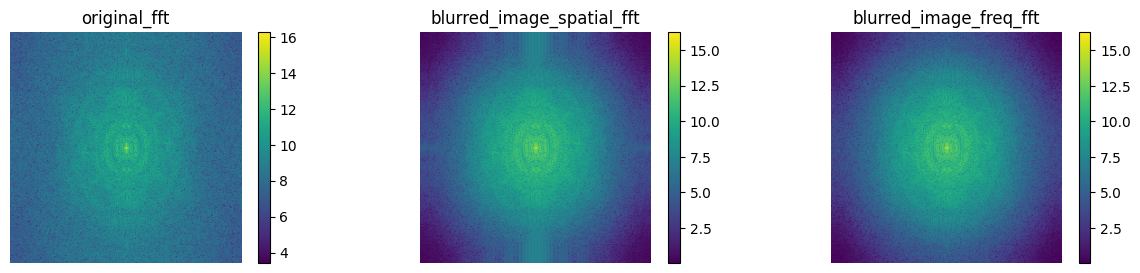

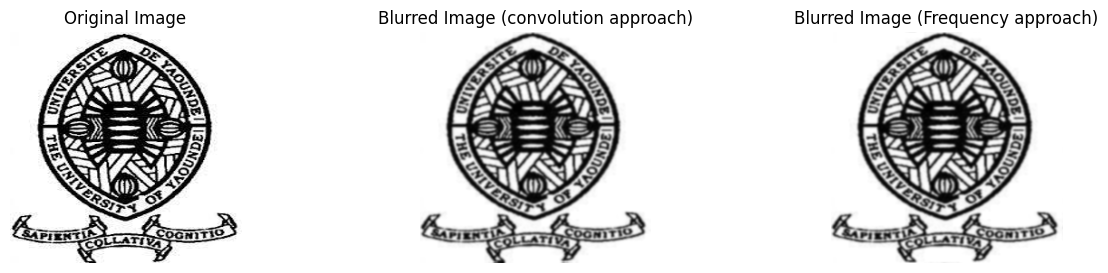

In [150]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.fftpack import fft2, fftshift
from scipy.fftpack import fft2, ifft2, fftshift
from scipy.ndimage import gaussian_filter, convolve
def plot_spectrum(fft_image, title):
    magnitude_spectrum = np.log1p(np.abs((fft_image)))
    plt.imshow(magnitude_spectrum, cmap='viridis')
    plt.title(title)
    plt.colorbar()
    plt.axis('off')
# Function to create a 2D Gaussian filter
def gaussian_filter_2d(size, sigma):
    x, y = np.meshgrid(np.linspace(-size // 2 + 1, size // 2, size), np.linspace(-size // 2 + 1, size // 2, size))
    g = np.exp(-((x**2 + y**2) / (2.0 * sigma**2)))
    return g / g.sum()

nimage = Image.open('uy1.jpg') # plt.imread(image_path)
N = np.max(np.shape(nimage))
#print(N)
size = (N, N)
image = nimage.resize(size)
if len(np.shape(image)) > 2:  # If the image is RGB, convert to grayscale
    image = np.mean(image, axis=2)
#print(np.shape(image))
image = np.array(image)

# Apply Gaussian filter using convolution in the spatial domain
kernel = gaussian_filter_2d(size=image.shape[0], sigma = 1)
blurred_image_spatial = convolve(image, kernel)
blurred_image_spatial_fft = fftshift(fft2(blurred_image_spatial))

# Define Gaussian function in frequency domain
def gaussian_kernel_freq(size, sigma):
    gaussian_filter = gaussian_filter_2d(size, sigma)
    
    # Compute the Fourier transform
    fft_gaussian = (fft2(gaussian_filter))
    return  fft_gaussian #kernel / np.sum(kernel) #

# Apply Gaussian filter in the frequency domain
def apply_gaussian_filter_fft(image, sigma):
    # FFT of the image
    image_fft = (fft2(image))
    # Create Gaussian kernel in frequency domain
    kernel_fft = gaussian_kernel_freq(image.shape[0], sigma)
    # Multiply image FFT with kernel FFT
    blurred_fft = image_fft * kernel_fft
    # Inverse FFT to get the blurred image
    blurred_image_freq = np.abs(ifft2(blurred_fft))
    
    return fftshift(blurred_image_freq), (fftshift(blurred_fft))

# Apply Gaussian filter using multiplication in the frequency domain
blurred_image_freq, blurred_image_freq_fft = apply_gaussian_filter_fft(image, sigma=  1)

# Plot magnitude spectra
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
plot_spectrum(fftshift(fft2(image)), 'original_fft')

plt.subplot(1, 3, 2)
plot_spectrum(blurred_image_spatial_fft, 'blurred_image_spatial_fft')

plt.subplot(1, 3, 3)
plot_spectrum(blurred_image_freq_fft, 'blurred_image_freq_fft')

# Plot original and blurred images
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred_image_spatial, cmap='gray')
plt.title('Blurred Image (convolution approach)')
plt.axis('off')

# Plot the blurred image (Frequency Domain)
plt.subplot(1, 3, 3)
plt.imshow(blurred_image_freq, cmap='gray')
plt.title('Blurred Image (Frequency approach)')
plt.axis('off')
plt.show()

### Example 3 of sensing matrix : Identity Matrix : Image TV denoising

\begin{align*}
x_{denoised} = TV_{\alpha}(x_{noisy}) := \arg \min_{x} \frac{1}{2} \| x_{noisy} - x \|_{2}^{2} + \alpha  \| \nabla x \|_{1}
\end{align*}

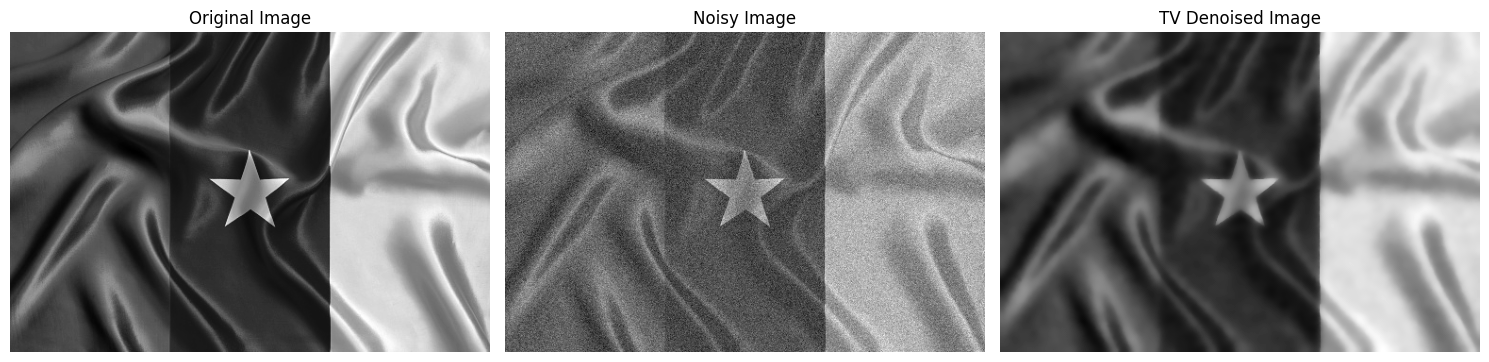

In [119]:
from skimage import color, data, restoration
from skimage.io import imread

# Load the image
#image_path = r'C:\Users\sefojere\Downloads\Cameroon_map.jpg'
#original_image = imread(image_path)
original_image = Image.open('flag.jpg')

# Convert to grayscale if the image is in color
if len(np.shape(original_image)) == 3:
    image_gray = color.rgb2gray(original_image)
else:
    image_gray = original_image

# Add synthetic noise to the image
noisy_image = image_gray + 0.1 * np.random.normal(loc=0, scale=1, size=np.shape(image_gray))

# Apply Total Variation denoising
tv_denoised_image = restoration.denoise_tv_chambolle(noisy_image, weight=0.5)

# Plot the original, noisy, and denoised images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(tv_denoised_image, cmap='gray')
plt.title('TV Denoised Image')
plt.axis('off')

plt.tight_layout()
plt.show()



### Germany
[DAAD](https://www2.daad.de/deutschland/stipendium/datenbank/en/21148-scholarship-database/)

### France
[PGSM](https://sciencesmaths-paris.fr/en/?view=article&id=324)

[Masters of Mathematics at Université Sorbonne Paris Nord](https://www.math.univ-paris13.fr/masters/index_English.html)

### Italy
[ICTP](https://www.ictp.it/news/2024/2/call-applications-postgraduate-diploma-programme)

<img src="leolin.jpg" width=800>

### Africa
[AIMS](https://nexteinstein.org/application/aims-masters-degree/) $\Longrightarrow$ [YAM](https://www.uni-muenster.de/MathematicsMuenster/careers/international/yam-fellowship-program/index.shtml)

<img src="yam.jpg" width=800>

### Benin
[IMSP](https://imsp-benin.com/home/)